<h1><center>Game of Thrones network analysis</center></h1>
<h3><center>Character co-occurence network analysis of Game of Thrones novels</center></h3>

The popular Game of Thrones, series on HBO is one of the most successful series based on the novel series - A song of Ice and Fire. With a gripping story and infamous for favourite characters dying out soon, this series of novels by George R. R. Martin, caught the world by a storm.<br>

This project deals with analyzing the network of co-occurence of characters in the first 5 novels of Game of Thrones/A song of Ice and Fire. Two characters are said to co-occur if the names of these characters appear in the vicinity of 15 words in the novel. A 15 work vicinity in general case would mean that the characters have interacted either in person, or one character has mentioned the other (indirect interaction).

There are 5 datasets, each for 1 book. Each dataset mentions a source and a target character name, of the two who have interacted, along with some weight - distance between the character names. All edges are considered to be undirected since no semantic information as to who is talking about whom is retrieved from the novels.

In [48]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

default_colors = [
    '#1f77b4',  '#ff7f0e',  '#2ca02c', '#d62728',  '#9467bd',   '#8c564b',  '#e377c2',  
    '#7f7f7f',  '#bcbd22',  '#17becf',  '#e6194b', '#3cb44b',   '#ffe119',  '#4363d8',
    '#f58231',  '#911eb4', '#46f0f0','#f032e6',    '#bcf60c',    '#fabebe',    '#008080', '#e6beff',
    '#9a6324','#fffac8',    '#800000',    '#aaffc3',    '#808000',    '#ffd8b1',    '#000075',
    '#808080',
]

To show a sample of the dataset being used for the project, it is loaded below and a few rows are printed.

In [2]:
df = pd.read_csv('/home/raj/Downloads/book1.csv')
df.head(5)

Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1

The important columns required to make the graph are - Source, Target and weight.<br>
Each of the 5 books are read in below. For each dataset, a undirected graph is created between Source and Target with the weight as attribute of the link.

In [3]:
prefix = "/home/raj/Downloads/"
book_fnames = ['book1.csv','book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
books= []
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    book.apply(lambda edge: G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight']), axis=1)
    books.append(G_book)

Each of the network is visualized below one after the other. The networks are very dense, and each novel has many characters, some more involved than the others.

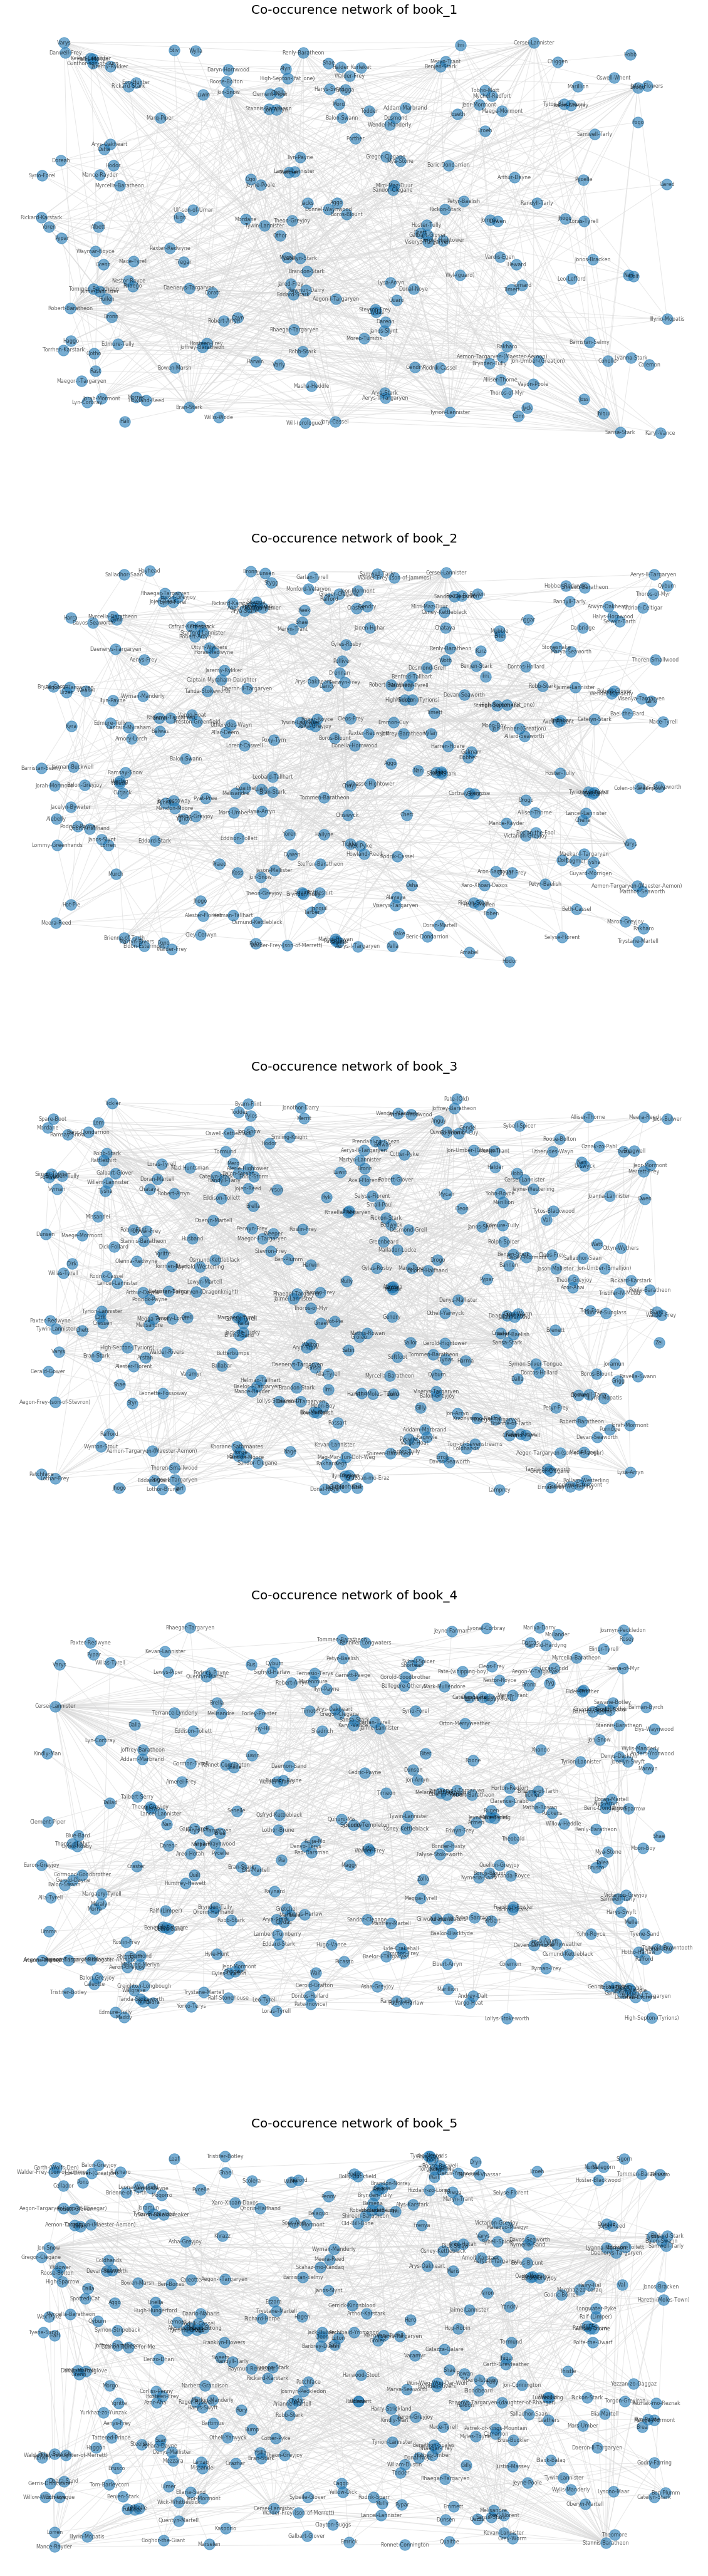

In [13]:
plt.subplots(figsize= (20,75))
for ind,book in enumerate(books):
    plt.subplot(5,1,ind+1)
    pos = nx.random_layout(book)
    nx.draw_networkx(
        book,
        pos= pos,
        edge_color= '0.85',
        node_size= 300,
        alpha= 0.6,
        font_size= 8
    )
    plt.title('Co-occurence network of book_'+str(ind+1), fontdict= {'size':20})
    plt.axis('off')

The networks are very dense and little sense can be made by just visual representation. Thus the next task is to understand the network via various metrics - 

* <b>radius</b>: Minimum eccentricity in the network
* <b>diameter</b>: Maximum distance between any pair of the nodes
* <b>average shortest distance</b>: Average of all shortest paths in the network
* <b>min/max degree</b>: Min/Max of all degrees in the network

For each network. The networks are also tested to check wether for the following -

* <b>Bipartite</b>
* <b>Strongly connected</b>


In [16]:
for ind,book in enumerate(books):
    print("Metrics of book_"+str(ind+1))
    print(f"Max degree in the network {max(nx.degree(book), key= lambda x: x[1])}")
    print(f"Min degree in the network {min(nx.degree(book), key= lambda x: x[1])}")
    print(f"Diameter of the network {nx.diameter(book)}")
    print(f"Radius of the network {nx.radius(book)}")
    print(f"Average shorted path lenght {nx.average_shortest_path_length(book)}")
    print(f"Is Bipartite? {nx.is_bipartite(book)}")
    print(f"Is Connected? {nx.is_connected(book)}")
    print('\n')

Metrics of book_1
Max degree in the network ('Eddard-Stark', 66)
Min degree in the network ('Clydas', 1)
Diameter of the network 7
Radius of the network 4
Average shorted path lenght 2.9124259674544306
Is Bipartite? False
Is Connected? True


Metrics of book_2
Max degree in the network ('Tyrion-Lannister', 53)
Min degree in the network ('Aegon-V-Targaryen', 1)
Diameter of the network 8
Radius of the network 4
Average shorted path lenght 3.416838765675975
Is Bipartite? False
Is Connected? True


Metrics of book_3
Max degree in the network ('Tyrion-Lannister', 59)
Min degree in the network ('Aegon-Targaryen-(son-of-Rhaegar)', 1)
Diameter of the network 8
Radius of the network 4
Average shorted path lenght 3.3839966778134767
Is Bipartite? False
Is Connected? True


Metrics of book_4
Max degree in the network ('Jaime-Lannister', 64)
Min degree in the network ('Aegon-Targaryen-(son-of-Rhaegar)', 1)
Diameter of the network 10
Radius of the network 5
Average shorted path lenght 3.982888158070

Networks of each novel are strongly connected and not Bipartite. Most of the metrics of each network are very close to eachother. The average shortest path length in the network is about 3 to 4, which shows that most characters are weaved together very closely in the novels. The characters with the lowest degree are those that are just mentioned in the novel and are not really live characters in the arc of the story.<br>

The next task is to determine the most important characters in each of the novels. There are different measures for importance - centrality. Each measure has a different significance. 

* Degree centrality
* Betweeness centrality
* Page Rank

Using each of these measures, the most important characters for each novel are found. Along with the importance, the evolution of character importance over the 5 novels is also visualized. The evolution shows the shift in the story line and how some characters grow in importance or shrink in importance as the story progresses.<br>

First let us find the important characters as per Degree centrality. It measures the fraction of degree of the node (in and out) upon the total number of nodes. In simpler terms, a node is said to be important if it has many connections in the network.

Important characters in book_1
('Eddard-Stark', 0.3548387096774194)
('Robert-Baratheon', 0.2688172043010753)
('Tyrion-Lannister', 0.24731182795698928)
('Catelyn-Stark', 0.23118279569892475)
('Jon-Snow', 0.19892473118279572)
('Robb-Stark', 0.18817204301075272)
('Sansa-Stark', 0.18817204301075272)
('Bran-Stark', 0.17204301075268819)
('Cersei-Lannister', 0.16129032258064518)
('Joffrey-Baratheon', 0.16129032258064518)


Important characters in book_2
('Tyrion-Lannister', 0.2054263565891473)
('Joffrey-Baratheon', 0.1821705426356589)
('Cersei-Lannister', 0.16666666666666666)
('Arya-Stark', 0.15503875968992248)
('Stannis-Baratheon', 0.1434108527131783)
('Robb-Stark', 0.13565891472868216)
('Catelyn-Stark', 0.12790697674418605)
('Theon-Greyjoy', 0.12403100775193798)
('Renly-Baratheon', 0.12015503875968991)
('Bran-Stark', 0.11627906976744186)


Important characters in book_3
('Tyrion-Lannister', 0.19536423841059603)
('Jon-Snow', 0.17218543046357615)
('Joffrey-Baratheon', 0.16556291390728478)
('R

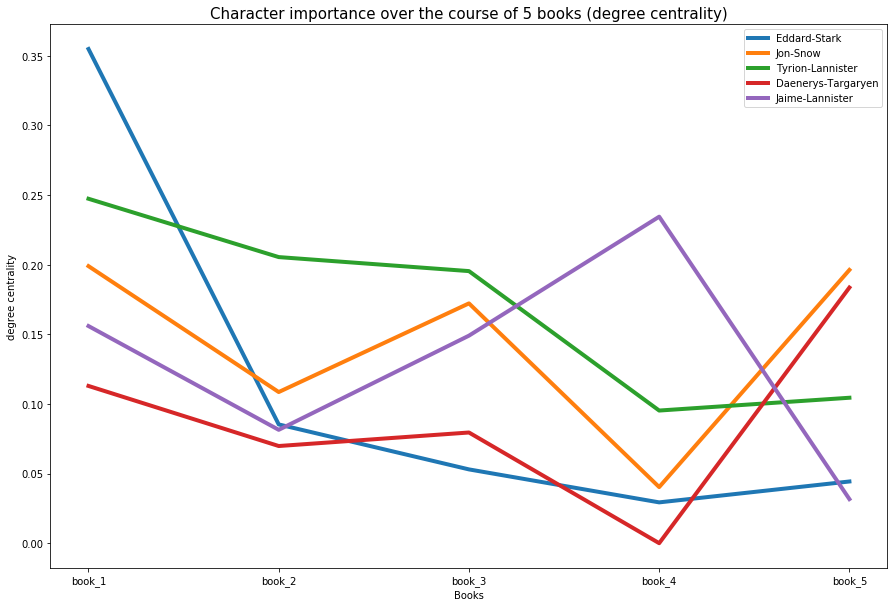

In [23]:
imp_chars_by_book = defaultdict(list)

for ind,book in enumerate(books):
    deg_centrality = nx.degree_centrality(book)
    sorted_deg_centrality = sorted(deg_centrality.items(), key= lambda k: k[1], reverse= True)[:10]
    imp_chars_by_book["book_"+str(ind+1)] = sorted_deg_centrality
    
for key,item in imp_chars_by_book.items():
    print(f"Important characters in {key}")
    for char in item:
        print(char)
    print('\n')
    
all_chars_deg_centrality = [nx.degree_centrality(book) for book in books]
char_evol = pd.DataFrame.from_records(all_chars_deg_centrality)
char_evol.fillna(0, inplace= True)

plt.figure(figsize=(15,10))
chars = ['Eddard-Stark','Jon-Snow', 'Tyrion-Lannister', 'Daenerys-Targaryen', 'Jaime-Lannister']

for char in chars:
    plt.plot(char_evol[char], label= char, linewidth= 4)
plt.xticks(ticks= [0,1,2,3,4], labels= ['book_'+str(i+1) for i in range(0,5)])
plt.xlabel('Books')
plt.ylabel('degree centrality')
plt.title('Character importance over the course of 5 books (degree centrality)', fontdict= {'size':15})
plt.legend()

Per book, the top 10 important characters (in order) are printed above. It is visible that some characters that were important in the 1st book, no longer remain important until the 5th book. Such a character evolution for 5 characters is shown in the visualization.
* Jaime Lannister
* Daenerys Targaryen
* Eddard Stark
* Tyrion Lannister
* Jon Snow

Eddard Stark was the most important character in the 1st book, and had set the base of the entire story, but since he was killed later, his importance declines. Similarly, the other characters which were not so important in the 1st book, gain importance as the story progresses such as - Jamie and Tyrion Lannister, who take up pivotal roles. Both Jon Snow and Daenerys Targaryen remain less important in the initial books, but become the most important characters in the 5th book. Book 4 shows a dip in importance of many characters except Jamie and Cerci Lannister, as this part revolves mostly around them. An interesting point to note, is that Eddard Stark has the highest degree centrality over all characters (number wise). This is because of his interactions in the North where he is the warder, and his interactions at King's Landing later on.<br>

The next measure is the betweeness centrality. It measures the fraction of shortest paths between a pair of nodes that passes through a node u, over all the shortest paths between a pair of nodes. Simply put, betweeness centrality assumes that a node is important if it connects many other nodes i.e. is in the shortest paths for many node connections.

Important characters in book_1
('Eddard-Stark', 0.2696038913836117)
('Robert-Baratheon', 0.21403028397371796)
('Tyrion-Lannister', 0.1902124972697492)
('Jon-Snow', 0.17158135899829566)
('Catelyn-Stark', 0.1513952715347627)
('Daenerys-Targaryen', 0.08627015537511595)
('Robb-Stark', 0.07298399629664767)
('Drogo', 0.06481224290874964)
('Bran-Stark', 0.05579958811784442)
('Sansa-Stark', 0.03714483664326785)


Important characters in book_2
('Arya-Stark', 0.1881116846731781)
('Jon-Snow', 0.17443976935054054)
('Robb-Stark', 0.1649406213117506)
('Tyrion-Lannister', 0.15532375650368552)
('Robert-Baratheon', 0.15374366220396257)
('Theon-Greyjoy', 0.14439534223860254)
('Stannis-Baratheon', 0.11951360907930143)
('Bran-Stark', 0.11323494837768544)
('Catelyn-Stark', 0.11104383596371503)
('Joffrey-Baratheon', 0.09078190285323477)


Important characters in book_3
('Jon-Snow', 0.2238286056882584)
('Robert-Baratheon', 0.1664354010358413)
('Robb-Stark', 0.16232085177685468)
('Tyrion-Lannister', 0.154090

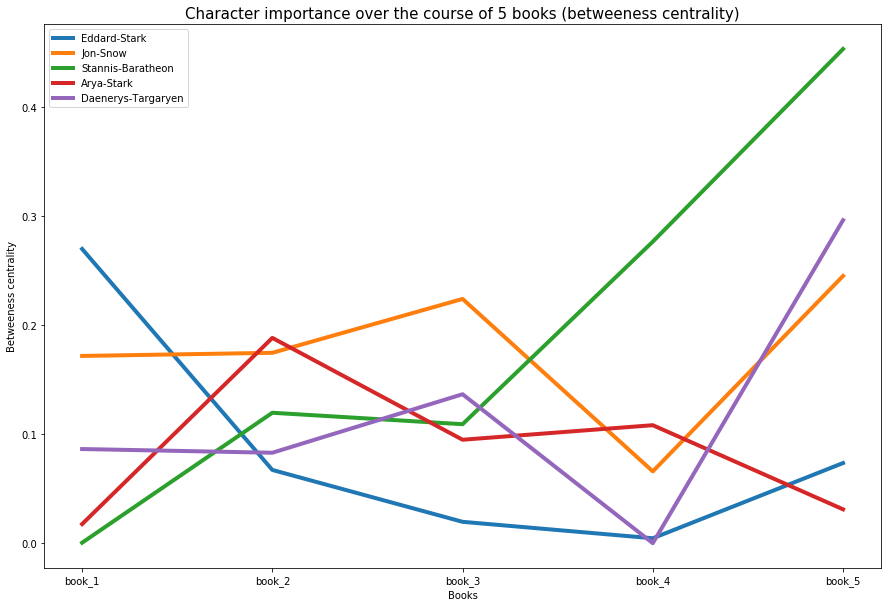

In [25]:
imp_chars_by_book = defaultdict(list)

for ind,book in enumerate(books):
    btw_centrality = nx.betweenness_centrality(book)
    sorted_btw_centrality = sorted(btw_centrality.items(), key= lambda k: k[1], reverse= True)[:10]
    imp_chars_by_book["book_"+str(ind+1)] = sorted_btw_centrality
    
for key,item in imp_chars_by_book.items():
    print(f"Important characters in {key}")
    for char in item:
        print(char)
    print('\n')

    all_chars_btw_centrality = [nx.betweenness_centrality(book) for book in books]
char_evol = pd.DataFrame.from_records(all_chars_btw_centrality)
char_evol.fillna(0, inplace=True)

chars = ['Eddard-Stark','Jon-Snow','Stannis-Baratheon','Arya-Stark','Daenerys-Targaryen']

plt.figure(figsize=(15,10))
for char in chars:
    plt.plot(char_evol[char], label= char, linewidth= 4)
plt.xticks(ticks= [0,1,2,3,4], labels= ['book_'+str(i+1) for i in range(5)])
plt.xlabel('Books')
plt.ylabel('Betweeness centrality')
plt.title('Character importance over the course of 5 books (betweeness centrality)', fontdict= {'size':15})
plt.legend()

The betweeness centrality results slightly deviate from that of the degree centrality. Most of the character importances are preserved, but some characters which are not important in terms of connections, are important in terms of bridging the gap between other characters. The visualizations shows the character evolution for:-

* Eddard Stark
* Jon Snow
* Stannis Baratheon
* Arya Stark
* Daenerys Targaryen

Similar to degree centrality results, Eddard Stark is the most important character in the 1st book in terms of both degree and betweeness, but declines further in the story after his demise. Stannis Baratheon on the contrary was not as important with respect to degree, but in terms of betweeness Stannis Baratheon is the most important character as the story progresses. This could be because of his interactions with various characters over time. Jon Snow and Daenerys Targaryen follow the same evolution for betweeness as shown in degree. Arya Stark, who is deemed to be important in the 2nd book, declines thereafter over the course of next 3 books.<br>

The next measure is the Page Rank. It assumes that important nodes in the network are those, which are reachable by many other nodes. If a random walk is conducted on the network, the pagerank gives the probability of the random walker to end up at that node. 

Important characters in book_1
('Eddard-Stark', 0.07236162026570053)
('Robert-Baratheon', 0.04849367196106828)
('Jon-Snow', 0.04770801150205559)
('Tyrion-Lannister', 0.04367631315626212)
('Catelyn-Stark', 0.03466661321136357)
('Bran-Stark', 0.029770049939322262)
('Robb-Stark', 0.029214217154195955)
('Daenerys-Targaryen', 0.02709861295221426)
('Sansa-Stark', 0.02694466267974005)
('Cersei-Lannister', 0.021620370924386133)


Important characters in book_2
('Tyrion-Lannister', 0.04686929713792863)
('Joffrey-Baratheon', 0.033513892358559484)
('Bran-Stark', 0.0320653883199087)
('Arya-Stark', 0.029019038425504035)
('Stannis-Baratheon', 0.02882124894104868)
('Jon-Snow', 0.028400705671148063)
('Theon-Greyjoy', 0.027659723368278766)
('Cersei-Lannister', 0.027440978890977803)
('Robb-Stark', 0.023135078569057416)
('Renly-Baratheon', 0.022946184909194596)


Important characters in book_3
('Jon-Snow', 0.037954125938873554)
('Tyrion-Lannister', 0.03639315478585651)
('Robb-Stark', 0.027921656742283554

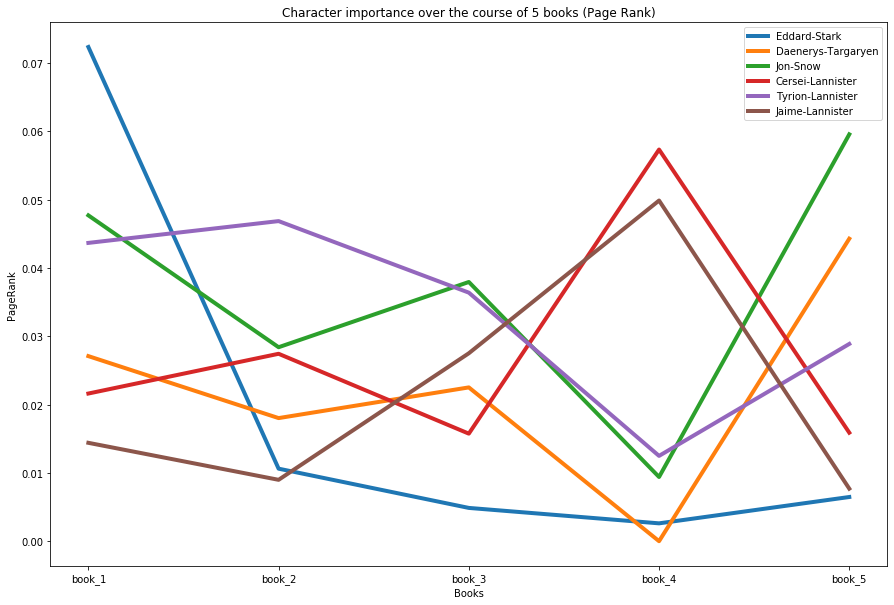

In [29]:
imp_chars_by_book = defaultdict(list)

for ind,book in enumerate(books):
    pageRank = nx.pagerank(book)
    sorted_pagerank_centrality = sorted(pageRank.items(), key= lambda k: k[1], reverse= True)[:10]
    imp_chars_by_book["book_"+str(ind+1)] = sorted_pagerank_centrality
    
for key,item in imp_chars_by_book.items():
    print(f"Important characters in {key}")
    for char in item:
        print(char)
    print('\n')
    
all_chars_pagerank = [nx.pagerank(book) for book in books]
char_evol = pd.DataFrame.from_records(all_chars_pagerank)
char_evol.fillna(0, inplace= True)

chars = ['Eddard-Stark','Daenerys-Targaryen','Jon-Snow','Cersei-Lannister','Tyrion-Lannister','Jaime-Lannister']

plt.figure(figsize= (15,10))
for char in chars:
    plt.plot(char_evol[char], label= char, linewidth= 4)
plt.xticks(ticks= [0,1,2,3,4], labels= ['book_'+str(i+1) for i in range(5)])
plt.xlabel('Books')
plt.ylabel('PageRank')
plt.title('Character importance over the course of 5 books (Page Rank)')
plt.legend()

The page rank measure, gives sligtly different than the previous betweeness centrality results. These results are close to identical to degree centrality results. The characters whose evolution is shown in the visualization are:-
* Jaime Lannister
* Tyrion Lannister
* Cersei Lannister
* Eddard Stark
* Jon Snow
* Daenerys Targaryen

The evolution of Eddard Stark, Jon Snow and Daenery's Targaryen is identical to that of the degree centrality results. Stannis Baratheon is no longer as important as it was shown in betweeneness centrality. The evolution of Jamie Lannister, Cersei Lannister and Tyrion Lannister, like most of the predecessors, is the same. The importance increases until book 4 and drastically decreases in book 5.<br>

Each importance measure, had different results based on different assumptions as to what is considered as an important charateristic. Thus to understand how much each measure, deviates from the other, correlation is found between the 3 metrics, with respect to each book.

In [30]:
for ind,book in enumerate(books):
    measures = [nx.pagerank(book), 
                nx.betweenness_centrality(book, weight='weight'), 
                nx.degree_centrality(book)]
    cor_df = pd.DataFrame.from_records(measures,index= ['pagerank','betweeness','degree'])
    print("Correlation between centrality measures for book_"+str(ind+1))
    print(cor_df.T.corr())
    print('\n')

Correlation between centrality measures for book_1
            pagerank  betweeness    degree
pagerank    1.000000    0.870210  0.949258
betweeness  0.870210    1.000000  0.871385
degree      0.949258    0.871385  1.000000


Correlation between centrality measures for book_2
            pagerank  betweeness    degree
pagerank    1.000000    0.796071  0.946047
betweeness  0.796071    1.000000  0.824200
degree      0.946047    0.824200  1.000000


Correlation between centrality measures for book_3
            pagerank  betweeness    degree
pagerank    1.000000    0.822604  0.955832
betweeness  0.822604    1.000000  0.841844
degree      0.955832    0.841844  1.000000


Correlation between centrality measures for book_4
            pagerank  betweeness    degree
pagerank    1.000000    0.656856  0.946802
betweeness  0.656856    1.000000  0.720553
degree      0.946802    0.720553  1.000000


Correlation between centrality measures for book_5
            pagerank  betweeness    degree
pagera

In all the books, the different measures show a high correlation, there by proving that the final results don't deviate much between them. The character importances found are reliable and accurate in terms of the network, as the same pattern is confirmed thrice.<br>

The next task is to find communities in the network. Community detection is to find clusters or groups in the network such that, the nodes within the community are highly connected as compared to outside the network. In terms of Game of Thrones, community detection can give insight into what groups of characters interact more within as compared to others. For example, Daenerys Targaryen, mostly spends her time Essos before coming to Westeros towards the end. Thus most of her interactions would be with the group of charaters in Essos or who travelled to Essos.<br>

Community detection is carried out for each book separately. Later, the evolution of these communities can be discussed. The evolution of communities over the course of 5 books, shows the movement of these characters. For example, Tryion Lannister spends most time in Westeros, and most interactions are with the Lannister family, the Starks etc, but later, he travels to Essos, to meet Daenerys targaryen. This will result in a change in the community.

NOTE:- Many characters are side characters and probably occur just twice or thrice, and have very limited interaction. Such characters just make the communities larger and dont add much value. Hence all those nodes having degree lesser than 4 are not considered for community detection.

In [107]:
sub_books = []
for book in books:
    nodes_to_keep = [name for name,deg in dict(nx.degree(book)).items() if deg > 4]
    sub_books.append(book.subgraph(nodes_to_keep))

Firstly, all those nodes with degree lesser than 4 are removed from each of the network. The resulting subgraphs are now going to be considered for the community detection. The algorithm used is the Girvan Newman algorithm, which detects communities based on betweeness centrality and modularity scores.<br>

A function to color each community for the network visualization is written below.

In [108]:
def color_communities(comm,n):
    """
    Color each node to represent the community
    
    parameters:
        comm: List of communities
        n: node
    
    returns:
        str: color in hex string
    """
    
    for ind,c in enumerate(comm):
        if n in c:
            return default_colors[ind]

The Girvan Newman algorithm works on a divisive strategy i.e. intitally the entire network is one community and iteratively breaks down to furtber communities. Hence, for each split i.e. number of communities formed, the modularity and performance scores are tallied. The number of communities giving highest modularity score is the chosen set.

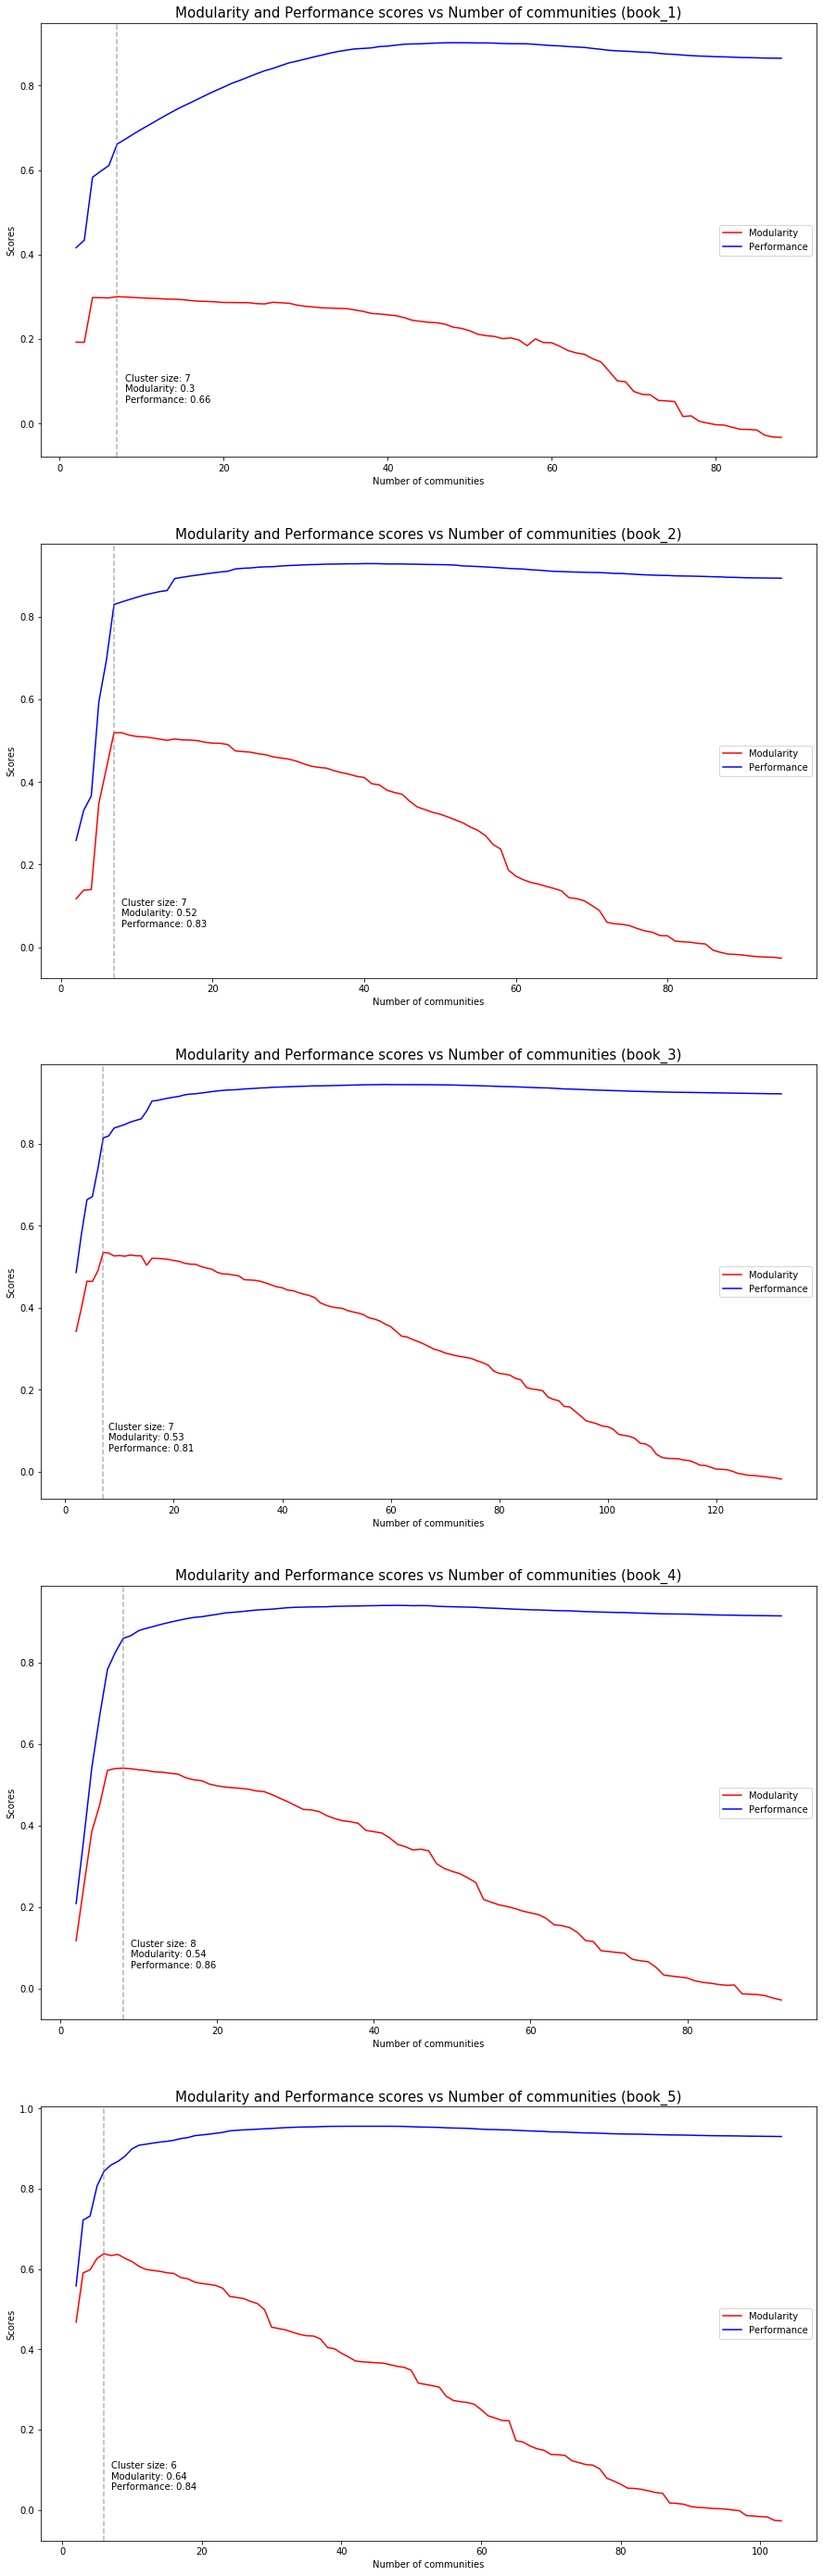

In [109]:
plt.figure(figsize= (15,50))
final_comm = []

for ind,book in enumerate(sub_books):
    g = nx.community.girvan_newman(book)
    gn_comm = []
    for i in g:
        gn_comm.append(i)
    
    plt.subplot(5,1,ind+1)
    mod_scores = [nx.community.modularity(book,g) for g in gn_comm]
    perf_scores = [nx.community.performance(book, g) for g in gn_comm]
    clusters = [x for x in range(2,len(gn_comm[-1])+1)]


    plt.plot(clusters, mod_scores, label= 'Modularity', color= 'r')
    plt.plot(clusters, perf_scores, label= 'Performance', color = 'b')
    plt.axvline(x= clusters[np.argmax(mod_scores)], color= 'grey', linestyle= '--', alpha= 0.6)
    plt.annotate(
        xy=(clusters[np.argmax(mod_scores)]+1,0.05),
        s='Cluster size: {}\nModularity: {}\nPerformance: {}'.format(
            clusters[np.argmax(mod_scores)],
            round(max(mod_scores),2),
            round(perf_scores[np.argmax(mod_scores)],2)
    ))
    plt.title("Modularity and Performance scores vs Number of communities (book_"+str(ind+1)+")", fontdict= {'size':15})
    plt.xlabel('Number of communities')
    plt.ylabel('Scores')
    plt.legend()
    final_comm.append(gn_comm[np.argmax(mod_scores)])

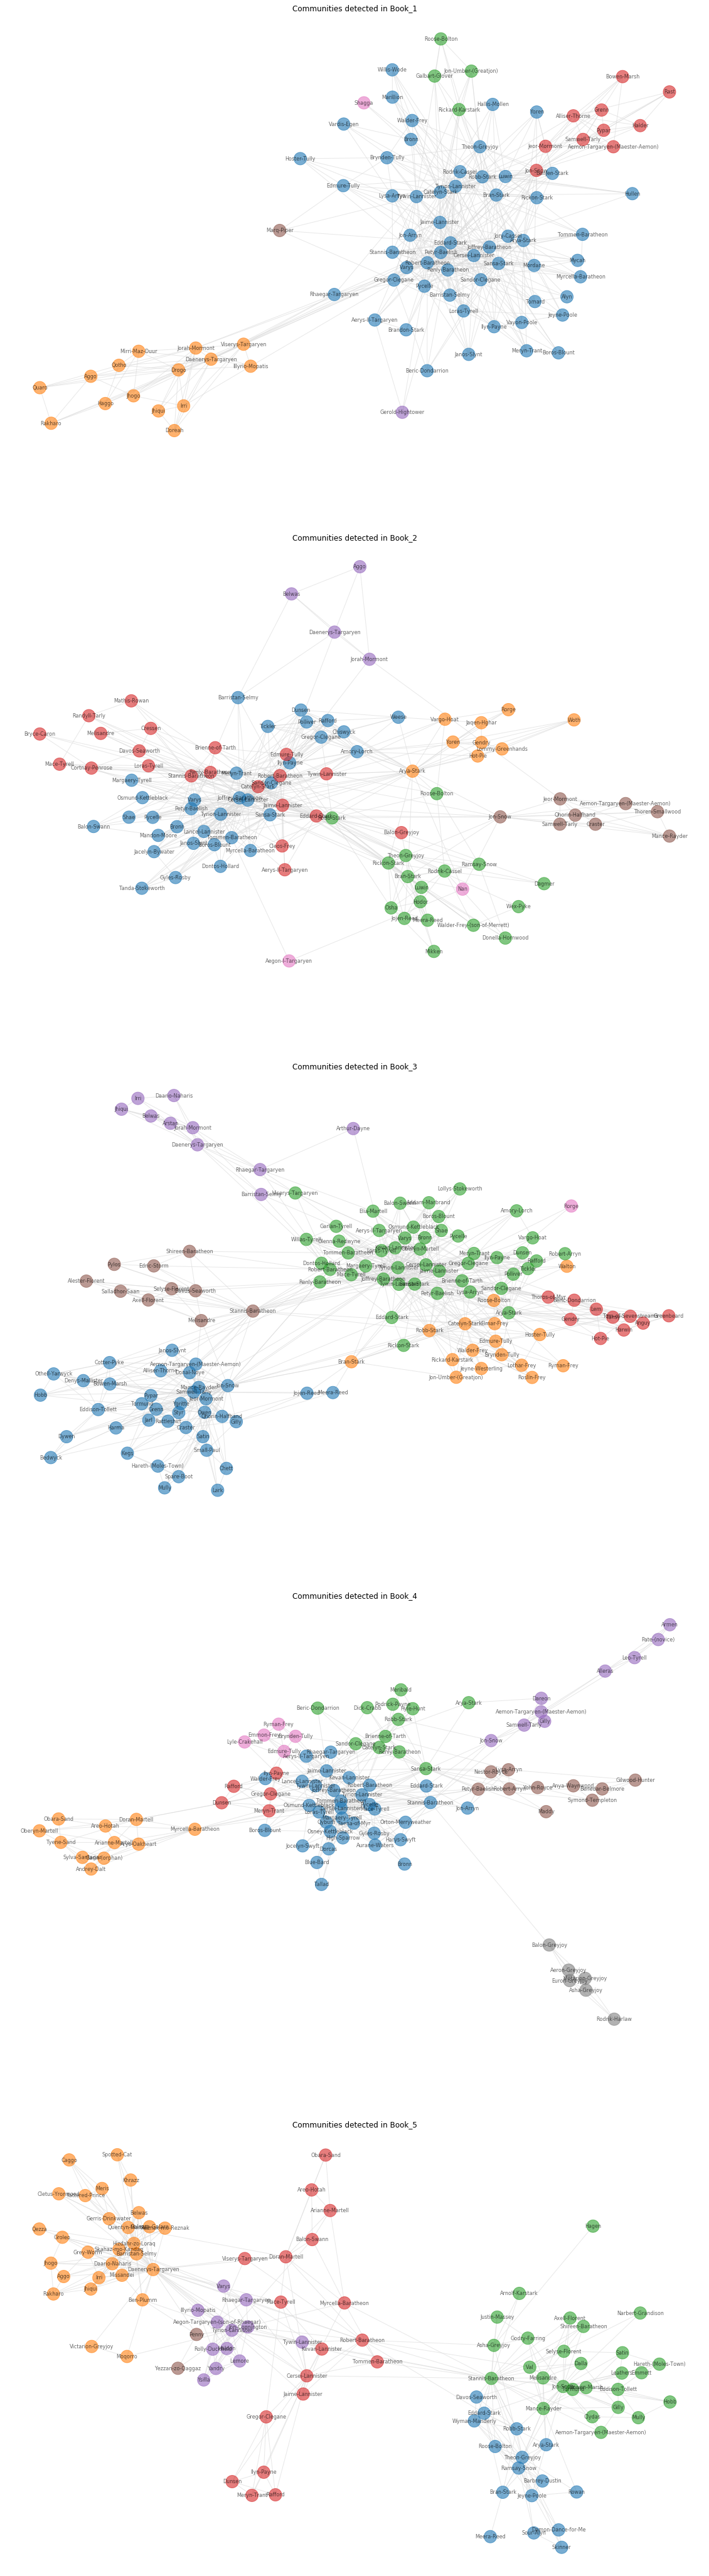

In [117]:
plt.subplots(figsize= (20,75))

for ind,(book,comm) in enumerate(zip(sub_books, final_comm)):
    color = [color_communities(comm, n) for n in book.nodes()]
    plt.subplot(5,1,ind+1)
    pos= nx.layout.fruchterman_reingold_layout(book)
    nx.draw_networkx(
        book,
        alpha= 0.6,
        node_size= 400,
        node_color= color,
        edge_color= '0.85',
        font_size= 8,
        pos= pos
    )
    plt.title('Communities detected in Book_'+str(ind+1))
    plt.axis('off')

The following communities have been discovered in each book:-

* <b>Book 1</b> - There are main 4 communities discovered. The first and the biggest (blue), which shows the interactions of the Baratheon, Stark family and all related characters in Winterfell and later King's Landing (Eddard Stark's becoming Hand of the King). The other community is that of Daenerys Targaryena and her interactions in Essos with Drogo, Jorah and related characters (orange). Apart from these, there are two smaller communities, one of the Night Watch (red) and the other of the Vassal families of the Stark (Kingdoms in North) (green). The rest single node communities are considered as noise.


* <b>Book 2</b> - The book 2 shows 2 larger communities and 4 smaller communities. One large community is of the Lannister family, Baratheon kids - Joffrey and Tommen with other related characters (blue). The other large community is between the related charactes of Stannis Baratheon and Renly Baratheon (red). Then there are 4 smaller ones - One of the Night's watch and Jon snow (brown), Daenerys Targaryen and related characters (purple), Arya Stark and her interaction with people on her journey (orange) and lastly the Stark's interactions bracing for a war (green). Single node communities are considered as noise.


* <b>Book 3</b> -  There are 6 communities in book 3. Each community is large enough. One community is of the Night's watch (blue), which is now larger and with more characters. The next community is of the Lannister/Baratheon family and their interaction in King's landing (green). One community (purple) is of Daenerys Targaryen and her journey in Essos to build an army. Then there are 3 a little smaller communities - Stannis Baratheon at DragonStone (brown), Arya Stark and related characters (red) and finally the Stark family alongside other Lords of the North (orange).


* <b>Book 4</b> - Book 4 consists of one very large community and then 7 very small commmunities. The large community is of the Lannister family again, in King's landing (blue). The rest 6 smaller communities are - Jon Snow and the Night's watch (purple), The Stark faimly (green), The lord of the Eyrie and knights of the Vale (brown), The Greyjoy family (grey) and the Tully family (pink) and lastly the smallest community of Gregor Clegane and his knights (red).


* <b>Book 5</b> - There are 5 main communities detected in book 5, all are larger communities. The largest community is of Daenerys Targaryen (orange). One community is of Stannis Baratheon (green). Then there are 3 more a little smaller communities - Stark family and other Boltons (blue), Lannister family (red) and the last one is of characters having brief interactons with the Targaryen family (purple).


As the story progresses, we can see the evolution of the communities and interactions between the characters. For example, initially the community of Daenerys Targaryen was as Khalesi and the army of Drogo. As the story progresses, Daenerys, loses people and gains the unsullied. Thus her community first decreses to a point where only Jorah is beside her and then increases as she acquires her army. Similarly, the Stark family is intially in a combined community with the Baratheons and Lannisters but later get separated in war, and the Stark family community keeps decreasing as the story progresses.